In [1]:
import pandas as pd
import seaborn as sns

In [29]:
df=pd.read_csv('/Users/mcikechukwu/Downloads/energydata_complete.csv')
df.head(5)

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [21]:
df.shape

(19735, 29)

In [30]:
 #rename columns
column_names = {'T1':'Kitchen_Temp', 'RH_1': 'Kitchen_Humidity',
                 'T2':  'Livingroom_Temp', 'RH_2': 'Livingroom_Humidity', 
                'T3': 'Laundryroom_Temp','RH_3': 'Laundryroom_Humidity', 
                'T4': 'Office_Temp','RH_4': 'Office_Humidity', 
                'T5': 'Bathroom_Temp','RH_5': 'Bathroom_Humidity',
                'T6': 'OutBuilding_Temp', 'RH_6': 'OutBuilding_Humidity', 
                'T7': 'Ironingroom_Temp', 'RH_7': 'Ironingroom_Humidity',
                'T8': 'Teenagerroom_Temp', 'RH_8': 'Teeenagerroom_Humidity',
                'T9': 'Parentroom_Temp', 'RH_9': 'Parentroom_Humidity',
                 'rv1': 'Random_Variable_1', 'rv2': 'Random_Variable_2'}
df = df.rename(columns=column_names)

In [31]:
df.head(3)

,date,Appliances,lights,Kitchen_Temp,Kitchen_Humidity,Livingroom_Temp,Livingroom_Humidity,Laundryroom_Temp,Laundryroom_Humidity,Office_Temp,...,Parentroom_Temp,Parentroom_Humidity,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,Random_Variable_1,Random_Variable_2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668


<AxesSubplot:xlabel='Livingroom_Temp', ylabel='OutBuilding_Temp'>

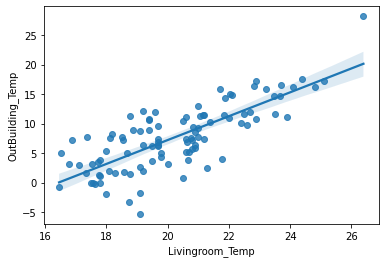

In [32]:
#select a sample of the dataset
simple_linear_reg_df = df[['Livingroom_Temp', 'OutBuilding_Temp']].sample(100, random_state=42)
#regression plot
sns.regplot(x="Livingroom_Temp", y="OutBuilding_Temp",data=simple_linear_reg_df)

In [33]:
df['date'] = df['date'].str.replace('-', '')
df['date'] = df['date'].str.replace(':', '')
df['date'] = df['date'].str.replace(' ', '')
df['date'] = df['date'].astype(float)

In [34]:
#Mean Absolute Error (MAE)
#Firstly, we normalise our dataset to a common scale using the min max scaler
from sklearn.preprocessing import MinMaxScaler
#df = df.drop(columns=['date', 'lights'],axis=1)
scaler = MinMaxScaler()
normalised_df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
features_df = normalised_df.drop(columns=['date', 'lights'])
target_variable = normalised_df['Appliances']
#Now, we split our dataset into the training and testing dataset. Recall that we
#had earlier segmented the features and target variables.
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
x_train, x_test, y_train, y_test = train_test_split(features_df, target_variable,test_size=0.3, random_state=42)
linear_model = LinearRegression()
#fit the model to the training dataset
linear_model.fit(x_train, y_train)
#obtain predictions
predicted_values = linear_model.predict(x_test)
#MAE
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, predicted_values)
round(mae, 3)

0.0

In [36]:
#Residual Sum of Squares (RSS)
import numpy as np
rss = np.sum(np.square(y_test - predicted_values)) 
round(rss, 3)

0.0

In [37]:
#Root Mean Square Error (RMSE)
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, predicted_values)) 
round(rmse, 3)

0.0

In [38]:
#R-Squared
from sklearn.metrics import r2_score
r2_score = r2_score(y_test, predicted_values) 
round(r2_score, 3)

1.0

In [40]:
#Ridge Regression
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=0.4)
ridge_reg.fit(x_train, y_train)

Ridge(alpha=0.4)

In [41]:
#Feature Selection and Lasso Regression
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(x_train, y_train)
#comparing the effects of regularisation
def get_weights_df(model, feat, col_name):
#this function returns the weight of every feature
    weights = pd.Series(model.coef_, feat.columns).sort_values()
    weights_df = pd.DataFrame(weights).reset_index()
    weights_df.columns = ['Features', col_name]
    weights_df[col_name].round(3)
    return weights_df

linear_model_weights = get_weights_df(linear_model, x_train, 'Linear_Model_Weight')
ridge_weights_df = get_weights_df(ridge_reg, x_train, 'Ridge_Weight')
lasso_weights_df = get_weights_df(lasso_reg, x_train, 'Lasso_weight')

final_weights = pd.merge(linear_model_weights, ridge_weights_df, on='Features')
final_weights = pd.merge(final_weights, lasso_weights_df, on='Features')

In [42]:
final_weights

,Features,Linear_Model_Weight,Ridge_Weight,Lasso_weight
0,Teeenagerroom_Humidity,-1.553397e-16,-0.000570,-0.000000
1,Livingroom_Temp,-1.552275e-16,-0.000732,0.000000
2,Windspeed,-1.530044e-16,0.000110,0.000000
3,Ironingroom_Humidity,-9.834812e-17,-0.000167,-0.000000
4,Ironingroom_Temp,-9.200157e-17,0.000037,0.000000
5,Parentroom_Temp,-6.952158e-17,-0.000686,0.000000
6,Office_Temp,-5.152382e-17,0.000099,0.000000
7,Visibility,-4.882938e-17,0.000044,0.000000
8,Random_Variable_2,-4.829524e-17,0.000003,-0.000000
9,Random_Variable_1,-4.829524e-17,0.000003,-0.000000
